# <center><h1><b><font color ='#000'>Autism Prediction</b> </font> </h1><center>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mnso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.svm import SVR 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from geneticalgorithm import geneticalgorithm as ga
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random
import warnings
warnings.filterwarnings('ignore')

C:\Users\20106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read Dataset

In [2]:
Data = pd.read_csv("D:/College/level 3 term 1/Genetic algorithm/project/Autism-prediction/train.csv")

In [3]:
Data.shape

(800, 22)

## Data preprocessing

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


### convert some features to binary values

In [6]:
features = ["austim","gender","jaundice","ethnicity","contry_of_res","used_app_before","age_desc","relation"]
for feature in features:
    Data[feature]= LabelEncoder().fit_transform(Data[feature])

In [7]:
Data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,10,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,0,8,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,10,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,...,0,8,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,...,1,2,0,1,32,0,7.949723,0,5,0


In [8]:
Data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,...,0.481250,4.682500,0.245000,0.146250,38.963750,0.043750,7.058530,0.0,4.281250,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,...,0.499961,3.903298,0.430356,0.353578,18.507785,0.204666,3.788969,0.0,1.552469,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.594654,0.0,0.000000,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,27.000000,0.000000,4.527556,0.0,5.000000,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,39.000000,0.000000,6.893472,0.0,5.000000,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,...,1.000000,10.000000,0.000000,0.000000,57.000000,0.000000,9.892981,0.0,5.000000,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,11.000000,1.000000,1.000000,60.000000,1.000000,13.390868,0.0,5.000000,1.000000


In [9]:
Data["Class/ASD"].value_counts()

0    615
1    185
Name: Class/ASD, dtype: int64

### check null values

In [10]:
Data.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

<AxesSubplot:>

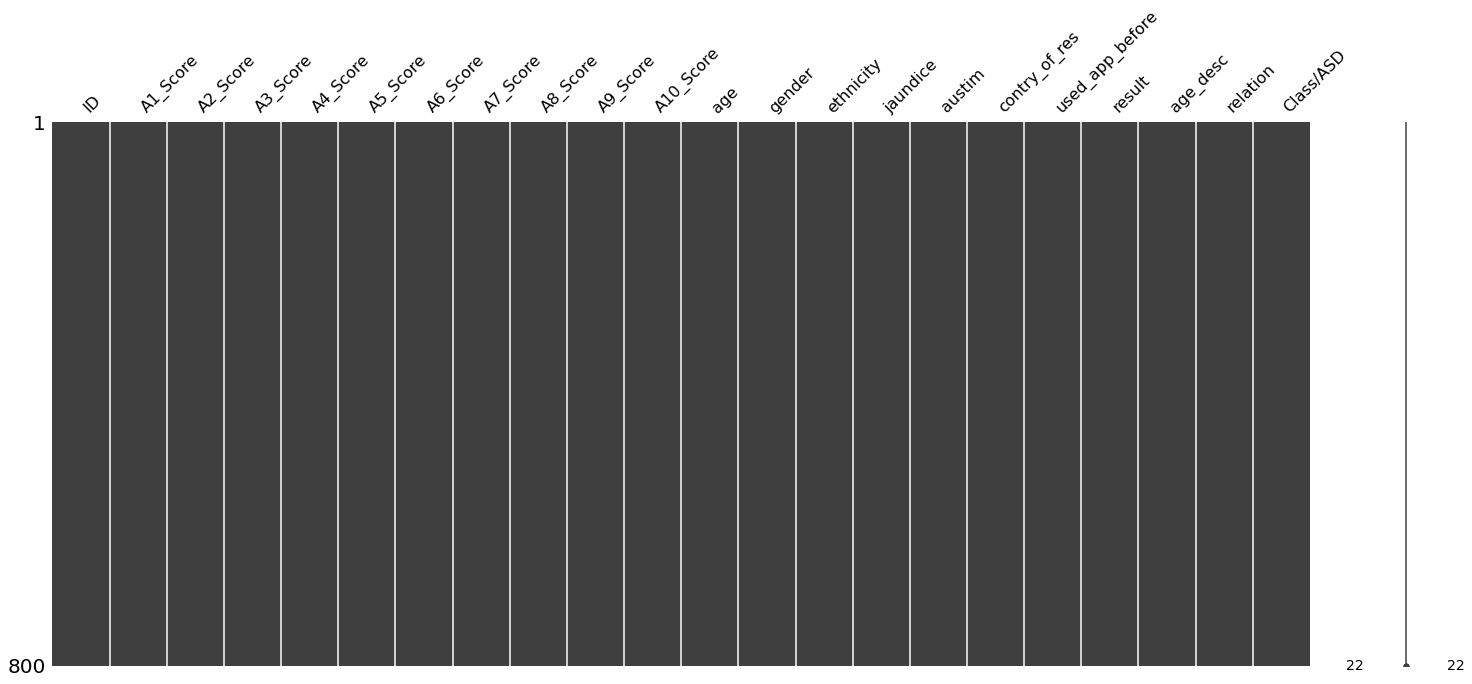

In [11]:
mnso.matrix(Data)

### check duplicate

In [12]:
Data.duplicated().sum()

0

## Data Visualization

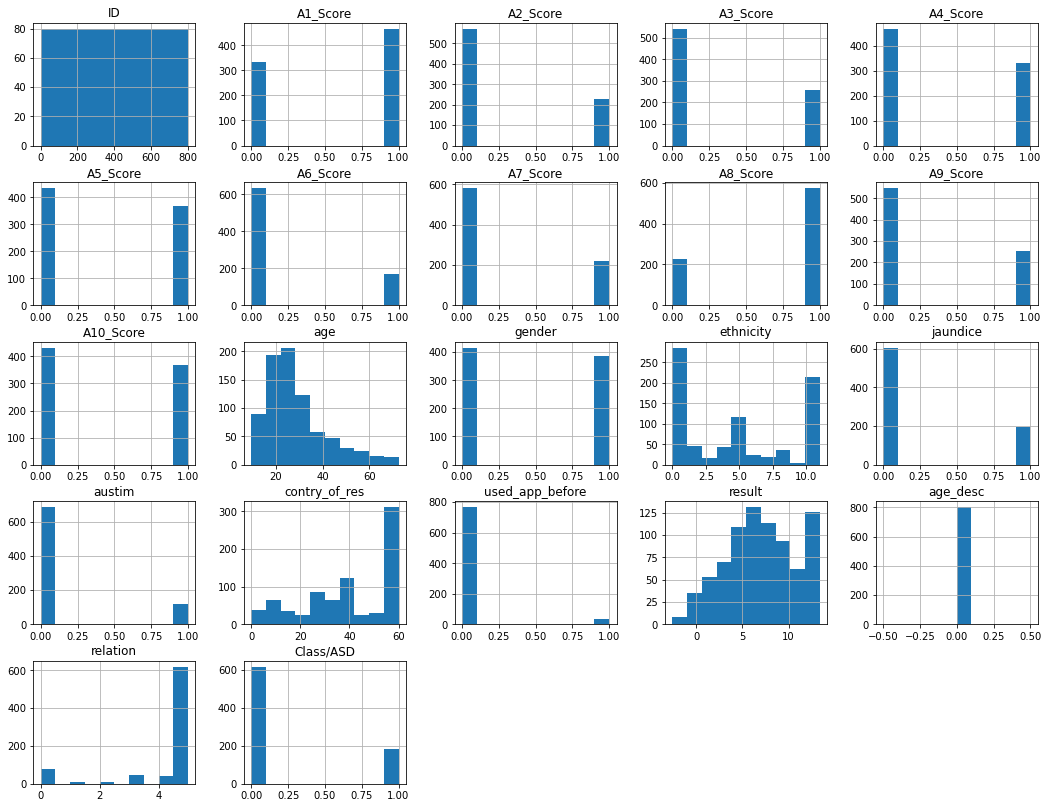

In [13]:
Data.hist(figsize= (18,14), bins= 10);

### handle outliers 

<AxesSubplot:>

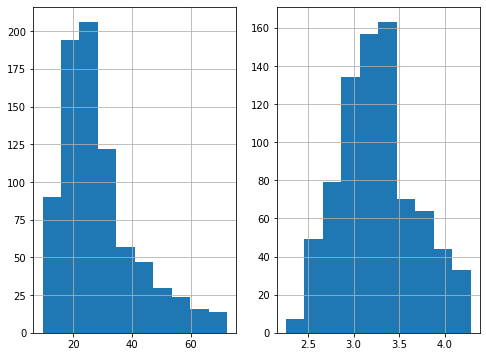

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
Data["age"].hist()
plt.subplot(1, 2, 2)
np.log(Data["age"]).hist()

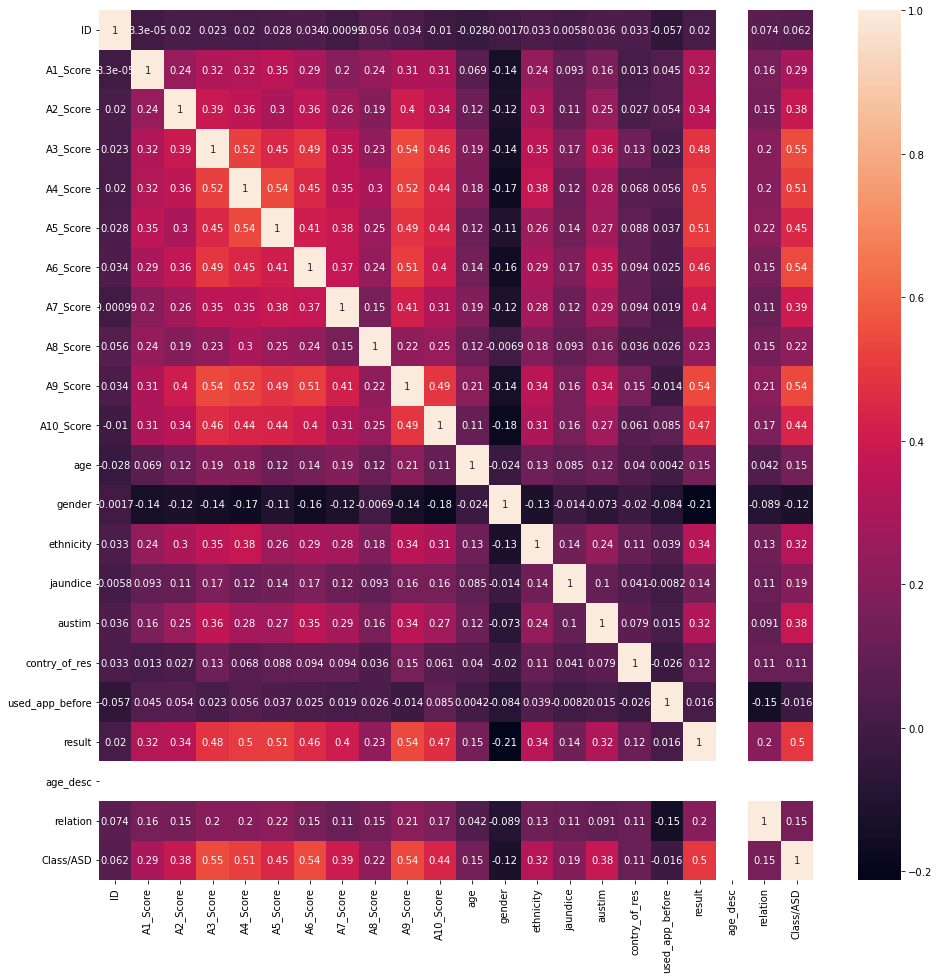

In [15]:
plt.figure(1 , figsize = (16, 16))
cor = sns.heatmap(Data.corr(), annot = True)

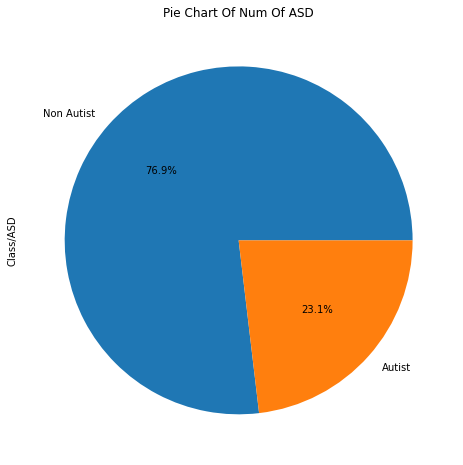

In [16]:
Data['Class/ASD'] = Data['Class/ASD'].map({0: 'Non Autist', 1: 'Autist'})

Data['Class/ASD'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.title("Pie Chart Of Num Of ASD")
plt.show()

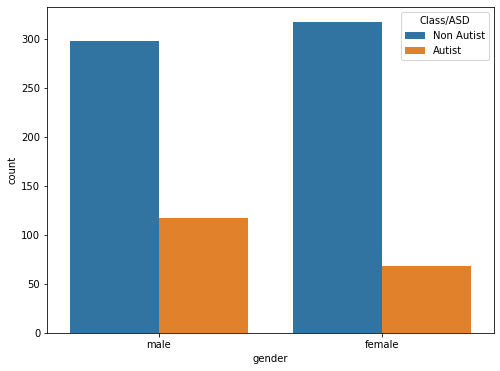

In [17]:
Data['gender'] = Data['gender'].map({0: 'male', 1: 'female'})

plt.figure(figsize=(8,6))
sns.countplot('gender',hue='Class/ASD',data=Data);

In [18]:
features = ["gender","Class/ASD"]
for feature in features:
    Data[feature]= LabelEncoder().fit_transform(Data[feature])

### show correlation between featurs and the target

In [19]:
Data[Data.columns[1:]].corr()['Class/ASD'][:-1]

A1_Score          -0.289991
A2_Score          -0.380703
A3_Score          -0.549618
A4_Score          -0.512792
A5_Score          -0.448473
A6_Score          -0.542588
A7_Score          -0.394660
A8_Score          -0.219034
A9_Score          -0.538688
A10_Score         -0.439587
age               -0.146376
gender            -0.124789
ethnicity         -0.324323
jaundice          -0.190769
austim            -0.377079
contry_of_res     -0.110710
used_app_before    0.015853
result            -0.496165
age_desc                NaN
relation          -0.152808
Name: Class/ASD, dtype: float64

In [20]:
Data = Data.drop(columns=["ID","age_desc","relation","used_app_before","contry_of_res","ethnicity","result"])

In [21]:
Data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,1,0,0,1
1,0,0,0,0,0,0,0,0,0,1,13.829369,1,0,0,1
2,1,1,1,1,1,1,0,0,1,1,14.679893,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61.035288,1,0,0,1
4,0,0,0,0,1,0,0,0,1,1,14.256686,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,42.084907,1,0,1,0
796,1,1,0,0,1,0,0,0,1,1,17.669291,1,0,0,1
797,0,0,0,0,0,0,1,0,1,1,18.242557,0,1,0,0
798,1,1,1,1,1,1,0,1,1,1,19.241473,1,0,1,1


## splitting Data

In [22]:
x = Data.drop("Class/ASD", axis=1)
y = Data["Class/ASD"]
y

0      1
1      1
2      0
3      1
4      1
      ..
795    0
796    1
797    0
798    1
799    1
Name: Class/ASD, Length: 800, dtype: int32

In [23]:
x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim
0,1,0,1,1,1,1,0,1,1,1,18.605397,1,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,1,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,1,0,0
3,0,0,0,1,0,0,0,0,0,0,61.035288,1,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,42.084907,1,0,1
796,1,1,0,0,1,0,0,0,1,1,17.669291,1,0,0
797,0,0,0,0,0,0,1,0,1,1,18.242557,0,1,0
798,1,1,1,1,1,1,0,1,1,1,19.241473,1,0,1


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# Models

## SVM

In [25]:
SVM = SVC(kernel='linear', random_state = 42) 
SVM.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [26]:
SVM.score(x_train, y_train)      #Train Accuracy

0.8875

In [27]:
y_pred_SVM = SVM.predict(x_test)
y_pred_SVM

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [28]:
SVM_accuracy = round (metrics.accuracy_score(y_test,y_pred_SVM)*100,2)
print("Accuracy: ", SVM_accuracy ,"%")

SVM_precision = round (metrics.precision_score(y_test,y_pred_SVM)*100,2)
print("Precision: " , SVM_precision ,"%")

SVM_recall = round (metrics.recall_score(y_test,y_pred_SVM)*100,2)
print("Recall: " , SVM_recall ,"%")

SVM_f1_score = round (metrics.f1_score(y_test,y_pred_SVM)*100,2)
print("F1 Score: ", SVM_f1_score,"%")

Accuracy:  85.0 %
Precision:  88.19 %
Recall:  92.56 %
F1 Score:  90.32 %


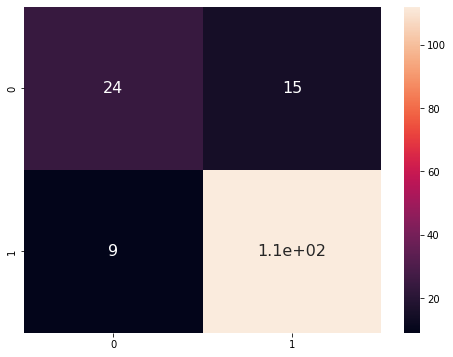

In [29]:
plt.figure(figsize=(8,6))
conf_matrix = metrics.confusion_matrix(y_test,y_pred_SVM)    
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

## SVM With Genetic Algorithm

 The best solution found:                                                                           
 [0.16949708 0.71299999 2.08017525]

 Objective function:
 -0.9296875


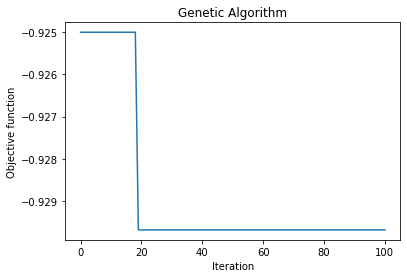

Optimized SVM Train Accuracy: 0.9390625
Optimized SVM Test Accuracy: 0.9125


In [30]:
# Generate a synthetic dataset for demonstration purposes
x, y = make_classification(n_samples=800, n_features=15, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']

# Define the SVM model evaluation function
def evaluate_svm(parameters):
    # Ensure that the index is within the valid range
    kernel_index = int(parameters[1]) % len(kernel_options)
    
    kernel = kernel_options[kernel_index]

    svm_model = SVC(C=parameters[0], kernel=kernel, gamma=parameters[2])
    scores = cross_val_score(svm_model, x_train, y_train, cv=5)
    return -scores.mean()  # Minimize negative mean cross-validated accuracy

# Define the parameter space for the genetic algorithm
varbound = np.array([[0.1, 10.0],  # C
                    [0, 3.999],     # kernel (0: linear, 1: poly, 2: rbf, 3: sigmoid)
                    [0.1, 5.0]])    # gamma

algorithm_param = {'max_num_iteration': 100, 'population_size': 20, 'mutation_probability': 0.1, 'elit_ratio': 0.01,
                   'crossover_probability': 0.5, 'crossover_type': 'uniform', 'max_iteration_without_improv': None,
                   'parents_portion': 0.3}

# Run the genetic algorithm
model = ga(function=evaluate_svm, dimension=3, variable_type='real', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

try:
    model.run()
    # Obtain the best parameters
    best_params = model.output_dict['variable']
    best_params = [float(param) for param in best_params]  # Convert parameters to float
    best_params[1] = int(best_params[1])  # Ensure 'kernel' parameter is an integer

    # Train the SVM with the optimized hyperparameters
    optimized_svm = SVC(C=best_params[0], kernel=kernel_options[best_params[1]], gamma=best_params[2])
    optimized_svm.fit(x_train, y_train)
    train_accuracy = optimized_svm.score(x_train, y_train)
    print(f"Optimized SVM Train Accuracy: {train_accuracy}")

    # Evaluate the optimized model
    test_accuracy = optimized_svm.score(x_test, y_test)
    print(f"Optimized SVM Test Accuracy: {test_accuracy}")

except Exception as e:
    print(f"An error occurred: {e}")

In [40]:
SVM_GA = SVC(C=0.16 ,kernel='linear', random_state = 42, gamma= 2.08) 
SVM_GA.fit(x_train, y_train)

SVC(C=0.16, gamma=2.08, kernel='linear', random_state=42)

In [41]:
SVM_GA.score(x_train, y_train) 

0.9375

In [42]:
y_pred_SVM_GA = SVM_GA.predict(x_test)
y_pred_SVM_GA

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1])

In [43]:
SVM_GA_accuracy = round (metrics.accuracy_score(y_test,y_pred_SVM_GA)*100,2)
print("Accuracy: " ,SVM_GA_accuracy ,"%")

SVM_GA_precision = round (metrics.precision_score(y_test,y_pred_SVM_GA)*100,2)
print("Precision: " , SVM_GA_precision ,"%")

SVM_GA_recall = round (metrics.recall_score(y_test,y_pred_SVM_GA)*100,2)
print("Recall: " , SVM_GA_recall ,"%")

SVM_GA_f1_score = round (metrics.f1_score(y_test,y_pred_SVM_GA)*100,2)
print("F1 Score: ", SVM_GA_f1_score,"%")


Accuracy:  91.25 %
Precision:  90.8 %
Recall:  92.94 %
F1 Score:  91.86 %


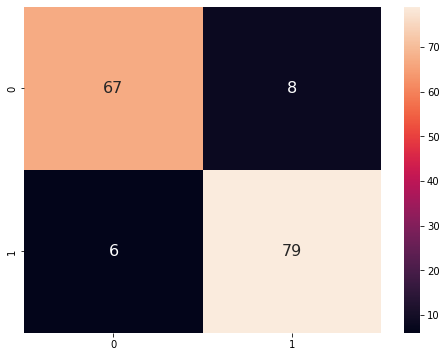

In [44]:
plt.figure(figsize=(8,6))
conf_matrix = metrics.confusion_matrix(y_test,y_pred_SVM_GA)    
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

## Comparison

In [45]:
comparison = pd.DataFrame({
  "SVM":{'Accuracy':SVM_accuracy,'Precision':SVM_precision,'Recall':SVM_recall,'F1 Score':SVM_f1_score},
  "SVM With GA":{'Accuracy':SVM_GA_accuracy,'Precision':SVM_GA_precision ,'Recall':SVM_GA_recall,'F1 Score':SVM_GA_f1_score}, 
})
comparison

,SVM,SVM With GA
Accuracy,85.00,91.25
Precision,88.19,90.80
Recall,92.56,92.94
F1 Score,90.32,91.86


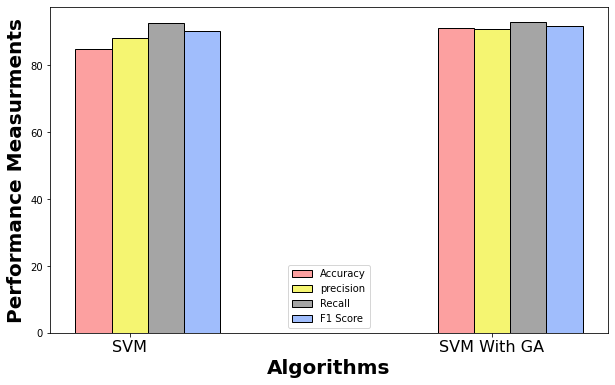

In [46]:
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 6))

Accuracy = [SVM_accuracy, SVM_GA_accuracy]
precision = [SVM_precision, SVM_GA_precision]
Recall = [SVM_recall, SVM_GA_recall]
F1_Score = [SVM_f1_score, SVM_GA_f1_score]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, Accuracy, color ='#FCA0A0', width = barWidth,
        edgecolor ='black', label ='Accuracy')
plt.bar(br2, precision, color ='#F5F571', width = barWidth,
        edgecolor ='black', label ='precision')
plt.bar(br3, Recall, color ='#a5a5a5', width = barWidth,
        edgecolor ='black', label ='Recall')
plt.bar(br4, F1_Score, color ='#A0BDFC', width = barWidth,
        edgecolor ='black', label ='F1 Score')
 
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 20)
plt.ylabel('Performance Measurments', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        ['SVM', 'SVM With GA'], fontsize= 16)
 
plt.legend()
plt.show()

## CNN Model

In [39]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))  
model.add(Dense(units=1, activation='sigmoid'))  

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=32, verbose=1)

y_pred = model.predict(x_test)
y_pred = np.round(y_pred).flatten()  
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Epoch 1/5
16/16 [==============================] - 1s 12ms/step - loss: 0.8822 - accuracy: 0.3047 - val_loss: 0.7684 - val_accuracy: 0.3672
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5742 - val_loss: 0.6189 - val_accuracy: 0.7422
Epoch 3/5
16/16 [==============================] - 0s 4ms/step - loss: 0.5622 - accuracy: 0.7793 - val_loss: 0.5173 - val_accuracy: 0.8672
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.8613 - val_loss: 0.4454 - val_accuracy: 0.9062
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Accuracy: 0.86875


## CNN Model With Genetic Algorithm

In [38]:
layer_choices = [Dense]  # Only using Dense layer for simplicity
activation_choices = ['relu', 'sigmoid']
n_units_choices = [64, 128, 256]

# Define the fitness function
def evaluate(individual):
    model = Sequential()
    model.add(Dense(units=individual[0], activation=individual[1], input_dim=x_train.shape[1]))  # Dense layer
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32, verbose=0)

    y_pred = model.predict(x_test)
    y_pred = np.round(y_pred).flatten() 
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Set the number of generations and population size
n_generations = 10
population_size = 10

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#the genetic algorithm
best_accuracy = 0
best_individual = None
for generation in range(n_generations):
    population = []
    for _ in range(population_size):
        individual = [random.choice(n_units_choices), random.choice(activation_choices)]  # Randomly select architecture choices
        accuracy = evaluate(individual)
        population.append((individual, accuracy))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_individual = individual

    # Sort population by accuracy in descending order
    population.sort(key=lambda x: x[1], reverse=True)

    # Select the top individuals for reproduction
    top_individuals = population[:int(population_size / 2)]

    # Create new individuals through crossover and mutation
    offspring = []
    for _ in range(population_size):
        parent1 = random.choice(top_individuals)[0]
        parent2 = random.choice(top_individuals)[0]
        child = [parent1[i] if random.random() < 0.5 else parent2[i] for i in range(2)]
        child[random.randint(0, 1)] = random.choice(n_units_choices)
        offspring.append(child)

    population = offspring

print('Best Accuracy:', best_accuracy)
print('Best Individual:', best_individual)

5/5 [==============================] - 0s 4ms/step
Best Accuracy: 0.90625
Best Individual: [256, 'relu']


## Comparison

|                |   CNN Model   |  CNN With GA  |
|----------------|---------------|---------------|
|    Accuracy    |     86.8%     |      90.6     |